# Présentation de la partie 1 de la SAE sur les graphes

Dans cette première partie de SAE sur les graphes, l'objectif est de pouvoir faire de la coloration de graphe, en utilisant l'algorithme de Welsh et Powell. La coloration de graphes sera utilisée pour établir un planning d'activités, pour plusieurs groupes de personnes, à partir des choix d'activités de chacun des groupes.

La représentation choisie pour les graphes est une matrice d'adjacence, qui sera représentée par un tableau de tableau (les noms des sommets sont des entiers et seront numérotés en commençant à 0). Nous considérons que le nombre de sommets du graphe ne pourra pas être modifié une fois le graphe construit. Un tableau contenant le nom associé à chaque sommet sera également créé.


### Présentation du problème et choix des activités

L'office de tourisme de votre département organise des semaines d'activités en petits groupes. Chaque groupe peut choisir 3 activités. Chaque activité ne peut avoir lieu qu'une seule journée chaque semaine et tous les groupes inscrits à cette activité y participe ce jour-là. On souhaite minimiser le nombre total de journées dans la semaine pour pouvoir faire toutes les activités.

Le premier onglet du document partagé https://uncloud.univ-nantes.fr/index.php/s/C7GToT824Me3FFJ donne les choix d'activités de chaque groupe. Chaque binôme doit ensuite choisir les 7 activités qu'il souhaite considérer et les indiquer dans l'onglet correspondant du document partagé (chaque binôme doit choisir parmi les activités du département assigné à son groupe).



## Installation de graphviz pour pouvoir visualiser les graphes


In [1]:
!pip install graphviz
import graphviz
graphviz.__version__, graphviz.version()

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


('0.10.1', (2, 40, 1))



## Création d'une fonction de conversion d'un graphe, défini par une matrice d'adjacence, vers le format graphviz


In [2]:
def creation_graphe_graphviz(g):
    # création d'un graphe non orienté
    dot = graphviz.Graph()
    
    # ajout des sommets
    for i in range(len(g)):
        dot.node(str(i))
    
    # ajout des arcs
    for i in range(len(g)):
        for j in range(i):
            if g[i][j] == 1:
                dot.edge(str(i), str(j))
    
    return dot

## Création du graphe non orienté correspondant au problème


#### Création du graphe, au format tableau de tableau, et du tableau des noms de sommets


In [3]:
graphe = [[0,1,0,0,0,1,0], #Act1
          [1,0,0,0,1,1,0], #Act2
          [0,0,0,1,0,0,1], #Act3
          [0,0,1,0,1,0,1], #Act4
          [0,1,0,1,0,1,1], #Act5
          [1,1,0,0,1,0,0], #Act6
          [0,0,1,1,1,0,0]] #Act7


noms_sommets = ["AKWA NATURE - CANOË-KAYAK",	
                "BILLARD CLUB BAULOIS",	
                "BLUE GREEN GOLF LE CROISIC",	
                "ESCAPE GAME 'TERREUR AU BIGNON'- THÉÂTRE IMMERSIF",	
                "PAINTBALL",	
                "MOTO-CROSS DE LA HUTIERE",	
                "PISCINE DES ARDRIERS"]

#### Création et affichage du graphe associé, au format graphviz


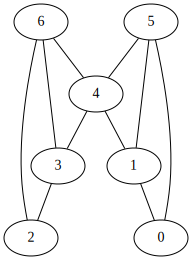

In [4]:
gdot = creation_graphe_graphviz(graphe)
#print(gdot.source)
gdot

## Fonctions utiles pour manipuler les graphes

#### Fonction qui construit un graphe vide (sans aretes), avec le nombre de sommets donné, et qui retourne la matrice d'adjacence correspondante

In [5]:
def graphe_vide(n):
    g = []
    for i in range(n):
        l = []
        for j in range(n):
            l.append(0)
        g.append(l)
    return g

#### Fonction qui retourne vrai si l'arete, dont les numéros de sommets extrémités sont donnés, existe

In [6]:
def est_arete(g, i, j):
    return g[i][j]

#### Fonction qui calcule le degré d'un sommet

In [7]:
def degre_entrant(g, s):
    somme = 0
    for i in range(len(g[s])) :
      if g[s][i] == 1 : somme += 1
    return somme

def degre_sortant(g, s):
    somme = 0
    for i in range(len(g[s])) :
      if g[i][s] == 1 : somme += 1
    return somme 

def degre(g, i):
    return degre_entrant(g,i)+degre_sortant(g,i)

In [8]:
# test de la fonction degre_total
print("degré total du sommet 0 :", degre(graphe,0))
print("degré total du sommet 1 :", degre(graphe,1))
print("degré total du sommet 2 :", degre(graphe,2))

degré total du sommet 0 : 4
degré total du sommet 1 : 6
degré total du sommet 2 : 4




## Fonction qui donne la coloration des sommets d'un graphe, en utilisant l'algorithme de Welsh-Powell, sous la forme d'une liste.


#### Fonction qui trie les sommets selon leur degré décroissant et qui retourne la liste des sommets ainsi triée

In [9]:
def tri_sommets_identique(tab) :
    for i in range(len(tab)) :
        tab_indice_identique = [tab[i]]
        for s in range(i+1,len(tab)) :
            if tab[s][0] == tab[i][0] :
                tab_indice_identique.append(tab[s])
        if len(tab_indice_identique) > 1 :
            tab_indice_identique = sorted(tab_indice_identique)
            tab = tab[:i] + tab_indice_identique + tab[i+len(tab_indice_identique):]
    return tab
    
        
def tri_sommets_indice(g):
    sommet = []
    sommet_indiceTriee = []
    for i in range(len(g)) :
        sommet.append([degre(g,i), i])
    sommet = sorted(sommet, reverse=True)
    sommet = tri_sommets_identique(sommet)
    for i in range(len(sommet)) :
            sommet_indiceTriee.append(sommet[i][1])
    return sommet_indiceTriee

def tri_sommets(g):
    sommet_indice = tri_sommets_indice(g)
    sommet_trie = []
    for i in range(len(sommet_indice)) :
        sommet_trie.append(g[sommet_indice[i]])
    return sommet_trie

In [10]:
# test de la fonction tri_sommets
print("tri des sommets du graphe 1, selon leur degré décroissant")
print(tri_sommets(graphe))

tri des sommets du graphe 1, selon leur degré décroissant
[[0, 1, 0, 1, 0, 1, 1], [1, 0, 0, 0, 1, 1, 0], [0, 0, 1, 0, 1, 0, 1], [1, 1, 0, 0, 1, 0, 0], [0, 0, 1, 1, 1, 0, 0], [0, 1, 0, 0, 0, 1, 0], [0, 0, 0, 1, 0, 0, 1]]


In [11]:
def estPasVoisinTab(sommet, g, couleurs,ordre_triee) :
    tabSommetPasVoisin = []
    for i in range(len(g)) :
        if g[i] == 0 and i != sommet :
                if couleurs[searchOrdre(i,ordre_triee)] == 0:
                    tabSommetPasVoisin.append(i)
    return tabSommetPasVoisin

def searchOrdre(sommet,ordre_triee) :
    for i in range(len(ordre_triee)) :
                if ordre_triee[i] == sommet:
                    return i
    return -1

def aCouleur(sommet,couleurs,ordre_triee) :
    return couleurs[searchOrdre(sommet,ordre_triee)] != 0
    
def estPasVoisin(sommet,matrice) :
    return matrice[sommet] != 1
    
def unionDeMatrice(graphe1,graphe2) :
    for i in range(len(graphe2)) :
        if graphe2[i] == 1 :
            graphe1[i] = 1
    return graphe1

In [12]:
def triCouleur(sommetNonTriee,couleurs) :
    couleursTriee = []
    sommetTriee = [i for i in range(len(couleurs))]
    for i in range(len(sommetTriee)) :
        for s in range(len(sommetNonTriee)) :
            if sommetNonTriee[s] == sommetTriee[i] : couleursTriee.append(couleurs[s])
    return couleursTriee

#### Fonction qui fait la coloration de sommets avec l'algorithme de Welsh-Powell

In [13]:
def coloration_sommets_welsh_powell(graphe):
    couleur_i = 0
    couleurs = [1]
    ordre_triee = tri_sommets_indice(graphe)
    for _ in range(len(ordre_triee)-1) : couleurs.append(0)
    i = -1
    ajoutCouleur = True
    while 0 in couleurs :
        i += 1
        if ajoutCouleur == True :
            couleur_i += 1
            ajoutCouleur = False
        matriceSommet = graphe[ordre_triee[i]]
        tabEstPasVoisin = estPasVoisinTab(ordre_triee[i],matriceSommet,couleurs,ordre_triee)
        for s in range(len(tabEstPasVoisin)) :
            if estPasVoisin(tabEstPasVoisin[s],matriceSommet) :
                if not aCouleur(ordre_triee[i],couleurs,ordre_triee) : couleurs[searchOrdre(ordre_triee[i],ordre_triee)] = couleur_i
                couleurs[searchOrdre(tabEstPasVoisin[s],ordre_triee)] = couleur_i
                grapheVoisin = graphe[tabEstPasVoisin[s]]
                graphe[ordre_triee[i]] = unionDeMatrice(matriceSommet, grapheVoisin)
                graphe[tabEstPasVoisin[s]] = unionDeMatrice(matriceSommet, grapheVoisin)
                ajoutCouleur = True
    couleurs = triCouleur(ordre_triee,couleurs)                    
    return couleurs

In [14]:
# test de la fonction coloration_sommets_welsh_powell
print("coloration des sommets du graphe")
couleurs_sommets = coloration_sommets_welsh_powell(graphe)
print(couleurs_sommets)

coloration des sommets du graphe
[1, 2, 1, 2, 1, 3, 3]


#### Fonction qui affiche un planning des activités par journée, à partir de la coloration calculée (en indiquant les noms des activités), en utilisant un dictionnaire

In [15]:
def planning_activites(couleurs, sommets):
    planning = {}
    for i in range(1,max(couleurs)+1) :
        planning["Journée "+str(i)] = [sommets[s] for s in range(len(couleurs)) if couleurs[s] == i]
    return planning

In [16]:
# test de la fonction planning_activites
print("planning des activités")
planning = planning_activites(couleurs_sommets, noms_sommets)
print(planning)

planning des activités
{'Journée 1': ['AKWA NATURE - CANOË-KAYAK', 'BLUE GREEN GOLF LE CROISIC', 'PAINTBALL'], 'Journée 2': ['BILLARD CLUB BAULOIS', "ESCAPE GAME 'TERREUR AU BIGNON'- THÉÂTRE IMMERSIF"], 'Journée 3': ['MOTO-CROSS DE LA HUTIERE', 'PISCINE DES ARDRIERS']}
